In [1]:
from statsbombpy import sb
import pandas as pd
from pandas import json_normalize
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

In [3]:
# Get competitions
comp = sb.competitions()
comp.to_csv('competitions.csv', index=False)
comp

credentials were not supplied. open data access only


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-09T14:06:05.802
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,None,None,None,None


In [3]:
# Get Matches from WSL - 2020/21
df = sb.matches(competition_id=37, season_id=90)
df.to_csv('matches.csv', index=False)

credentials were not supplied. open data access only


In [4]:
match = 3764235
match_events = sb.events(match_id=match)

credentials were not supplied. open data access only


In [5]:
# split locations into x and y components
match_events[['location_x', 'location_y']] = match_events['location'].apply(pd.Series)
match_events[['pass_end_location_x', 'pass_end_location_y']] = match_events['pass_end_location'].apply(pd.Series)

In [6]:
# split the shot_end_locations into x,y and z - some z missing
match_events['shot_end_location_x'], match_events['shot_end_location_y'], \
    match_events['shot_end_location_z'] = np.nan, np.nan, np.nan

end_locations = np.vstack(match_events.loc[match_events.type == 'Shot'].shot_end_location.apply(
    lambda x: x if len(x) == 3 else x + [np.nan]).values)

match_events.loc[match_events.type == 'Shot', 'shot_end_location_x'] = end_locations[:, 0]
match_events.loc[match_events.type == 'Shot', 'shot_end_location_y'] = end_locations[:, 1]
match_events.loc[match_events.type == 'Shot', 'shot_end_location_z'] = end_locations[:, 2]


In [7]:
# clean up and choose the columns wanted
events_df = match_events[[
    'index', 'id', 'duration', 'match_id', 'minute', 'pass_angle', 'pass_height', 'pass_length', 'pass_outcome',
    'pass_recipient', 'pass_shot_assist', 'period', 'play_pattern', 'player', 'player_id', 'position', 'possession',
    'possession_team', 'possession_team_id', 'shot_type', 'shot_outcome', 'team', 'timestamp', 'type', 'location_x',
    'location_y', 'pass_end_location_x', 'pass_end_location_y', 'shot_end_location_x', 'shot_end_location_y',
    'shot_end_location_z'
]]
events_df.to_csv('match_events.csv', index=False)

In [8]:
# create separate data sheet with freeze frame
shots = match_events.loc[match_events['type'] == 'Shot'].set_index('id', 'match')

shot_freeze_frame = match_events['shot_freeze_frame']

ffs = {}

C:\Users\rdelm\AppData\Local\Temp/ipykernel_13004/1808607821.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only
  shots = match_events.loc[match_events['type'] == 'Shot'].set_index('id', 'match')


In [9]:
for id_, row in shots.iterrows():
    try:
        ff = json_normalize(row.shot_freeze_frame, sep="_")
        ff = ff.assign(x=ff.apply(lambda x: x.location[0], axis=1)). \
            assign(y=ff.apply(lambda x: x.location[1], axis=1)). \
            drop('location', axis=1). \
            assign(id=id_)
        ffs[id_] = ff
    except:
        pass

# concatenate all the Freeze Frame dataframes
ff_df = pd.concat(ffs)
ff_df.to_csv('match_shot_freeze_frames.csv', index=False)

In [12]:
DATOS = pd.read_csv("./match_events.csv")
pases=DATOS.loc[match_events['type'] == 'Pass'].set_index('id', 'match')

C:\Users\rdelm\AppData\Local\Temp/ipykernel_13004/757590967.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only
  pases=DATOS.loc[match_events['type'] == 'Pass'].set_index('id', 'match')


In [13]:
pases.head()

,index,duration,match_id,minute,pass_angle,pass_height,pass_length,pass_outcome,pass_recipient,pass_shot_assist,...,team,timestamp,type,location_x,location_y,pass_end_location_x,pass_end_location_y,shot_end_location_x,shot_end_location_y,shot_end_location_z
id,,,,,,,,,,,,,,,,,,,,,
d4d1a8ca-79c3-4e61-a717-34c7ea95b0d8,5,0.407715,3764235,0,-2.986596,Ground Pass,3.238827,NaN,Charlie Wellings,NaN,...,Bristol City WFC,00:00:00.437,Pass,61.0,40.1,57.8,39.6,NaN,NaN,NaN
549c46de-9270-495a-8cf9-f35de73158f7,8,1.237783,3764235,0,-2.830594,Ground Pass,8.823265,NaN,Ella Jade Mastrantonio,NaN,...,Bristol City WFC,00:00:00.887,Pass,60.4,40.6,52.0,37.9,NaN,NaN,NaN
c0abb5b5-de32-4583-9514-7fdb16f3d4e9,11,2.000000,3764235,0,2.562146,Ground Pass,25.933184,NaN,Jasmine Matthews,NaN,...,Bristol City WFC,00:00:02.274,Pass,52.0,37.9,30.3,52.1,NaN,NaN,NaN
38b85dec-0d27-4020-8deb-66f4c0abdcfb,14,2.420555,3764235,0,-1.841154,Ground Pass,36.319280,NaN,Gemma Evans,NaN,...,Bristol City WFC,00:00:05.802,Pass,28.3,48.5,18.6,13.5,NaN,NaN,NaN
14ef080f-96da-4472-a765-2523198a8d23,17,5.230229,3764235,0,-0.019523,High Pass,71.713670,NaN,Yana Daniels,NaN,...,Bristol City WFC,00:00:08.533,Pass,18.7,12.4,90.4,11.0,NaN,NaN,NaN


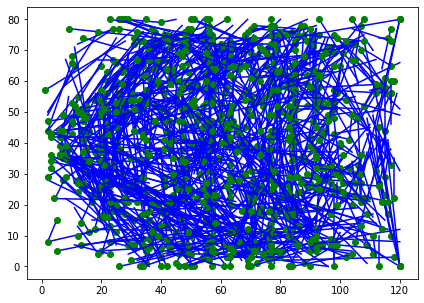

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)

for i in range(len(pases)):
    plt.plot([int(pases["location_x"][i]),int(pases["pass_end_location_x"][i])],
             [int(pases["location_y"][i]),int(pases["pass_end_location_y"][i])], 
             color="blue")
    plt.plot(int(pases["location_x"][i]),int(pases["location_y"][i]),"o", color="green")
plt.show()

###  TIROS

In [ ]:
shots = df[df.type_name == 'Shot'].set_index('id')
shots.head()

In [ ]:
from FCPython import createPitch

In [ ]:
pitch_width = 120
pitch_height = 80

fig, ax = createPitch(pitch_width, pitch_height, 'yards', 'gray')

home_team = 'South Korea'
away_team = 'Germany'

for i, shot in shots.iterrows():
    x = shot['location'][0]
    y = shot['location'][1]
    
    goal = shot['shot_outcome_name']=='Goal'
    team_name = shot['team_name']
    
    circle_size = 2
    circle_size = np.sqrt(shot['shot_statsbomb_xg'] * 15)
    
    if team_name == home_team:
        if goal:
            shot_circle = plt.Circle((x, pitch_height-y), circle_size, color='red')
            plt.text((x+1), pitch_height-y+1, shot['player_name'])
        else:
            shot_circle = plt.Circle((x, pitch_height-y), circle_size, color='red')
            shot_circle.set_alpha(.2)
    elif team_name == away_team:
        if goal:
            shot_circle = plt.Circle((pitch_width-x, y), circle_size, color='blue')
            plt.text((pitch_width-x+1), y+1, shot['player_name'])
        else:
            shot_circle = plt.Circle((pitch_width-x, y), circle_size, color='blue')
            shot_circle.set_alpha(.2)
    
    ax.add_patch(shot_circle)
    
plt.text(5, 75, away_team + ' shots')
plt.text(80, 75, home_team + ' shots')

plt.title('Germany vs South Korea at 2018 FIFA World Cup')

fig.set_size_inches(10, 7)
fig.savefig('korger_shots.png', dpi=300) 

plt.show()